# Restricted Random Walk in One Dimension

## A. Trap Boundaries
In one-dimensional restricted random walk with trap boundaries, there are trap sites at $x = 0$ and $x = L~(L > 0)$. A walker starts from $x_0$ $(0 < x_0 < L)$ and takes unit steps to the right with probability $p$ or  to the left with probability $q=1-p$. When the walker arrives at a trap site, it can no longer move.  The mean number of steps for the walker to be trapped (the mean first passage time) for $p = 1/2$ is given by.

$$ \tau = \frac{1}{2D}x_0(x_0-L),$$

where $D$ is the self-diffusion coefficient in the absence of the traps, and the average is over all possible walks.

### A-1. Gambler's Ruin Problem
Random walk with trap boundaries is related to the gambler's ruin problem. The gambler (walker) starts with $x_0$ dollars and at each step (toss of a coin), the gambler either wins 1 dollar (steps to the right) with probability $p$ or losses 1 dollar (steps to the left) with probability $q =1- p$. The game ends either when the gambler is bankrupt (has $x=0$ dollar), and is ruined, or the gambler reaches a total of $x = L$ dollars, has won the game. 

The exact probability that the gambler is eventually ruined given he initially started with $x_0$ dollars is given by

$$ P(x = 0|x_0) = \frac{\left( \frac{q}{p}\right)^{x_0}- \left( \frac{q}{p}\right)^{L}}{1- \left( \frac{q}{p}\right)^{L}}, \quad \text{for}~ \frac{q}{p} \neq 1$$

$$ P(x = 0|x_0) =1-\frac{x_0}{L}, \quad \text{for}~ p = q = 1/2$$


We would like to obtain the following quantities by Monte Carlo simulation.

- The mean number of steps for the walker (gambler) to be trapped (ruined). 
- The probability of the walker (gambler) being trapped (ruined) at $x = 0$.

## B. Reflecting Boundaries

In one-dimensional restricted random walk with reflecting boundaries, there are reflecting sites at $x = -L$ and $x = L$. A walker starting from $x = 0$ steps with probability $p$ to the right or $q = 1-p$ to the left. However, when the walker reaches site $x = L~(x = -L)$, the next step is reflected to site $x = L-1~(x = -L +1)$.


We would like to obtain the following observables:

- The mean-squared displacement of the walker after $N$ steps.
- The mean number of distinct sites visited during the course of $N$ step walk.
- The probability that the displacement of the walker from the origin is $x$ after $N$ steps.

In [8]:
%matplotlib inline

# ignore deprecated warning
import warnings
warnings.filterwarnings("ignore")

# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt

# set font scale and style
plt.rcParams.update({'font.size': 18})

In [9]:
# import custom class
%run -i '../src/restricted_random_walk_1d.py'

# A. Trap Boundaries

## A-1. Trajectories

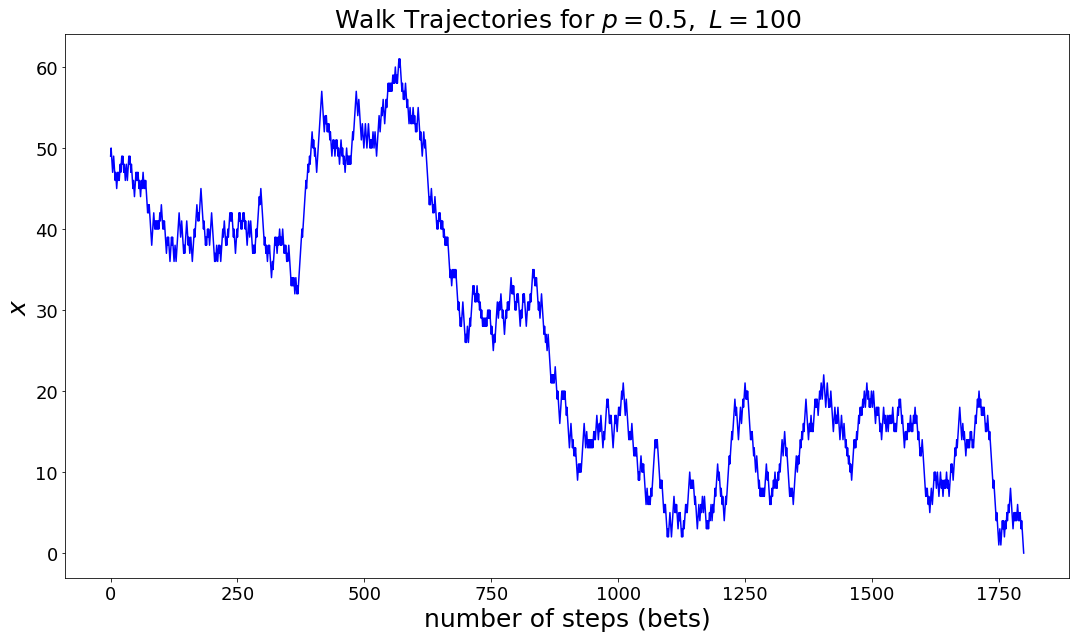

In [11]:
plt.subplots(figsize=(18, 10))
param_dict = {
    'nsteps': 10**6, 
    'ntrials': 0, 
    'p': 0.5,
    'L': 100,
    }
walk = RestrictedRandomWalk1D(*param_dict)
traj, _ = walk.step_count_b4_trap()

plt.plot(range(len(traj)), traj, color = 'b')
plt.xlabel(r'number of steps (bets)', fontsize = 25)
plt.ylabel(r'$x$', fontsize = 25)
plt.title(r'Walk Trajectories for $p=0.5, ~ L = 100$', fontsize = 25)
plt.show()

## A-2. Mean First Passage Time

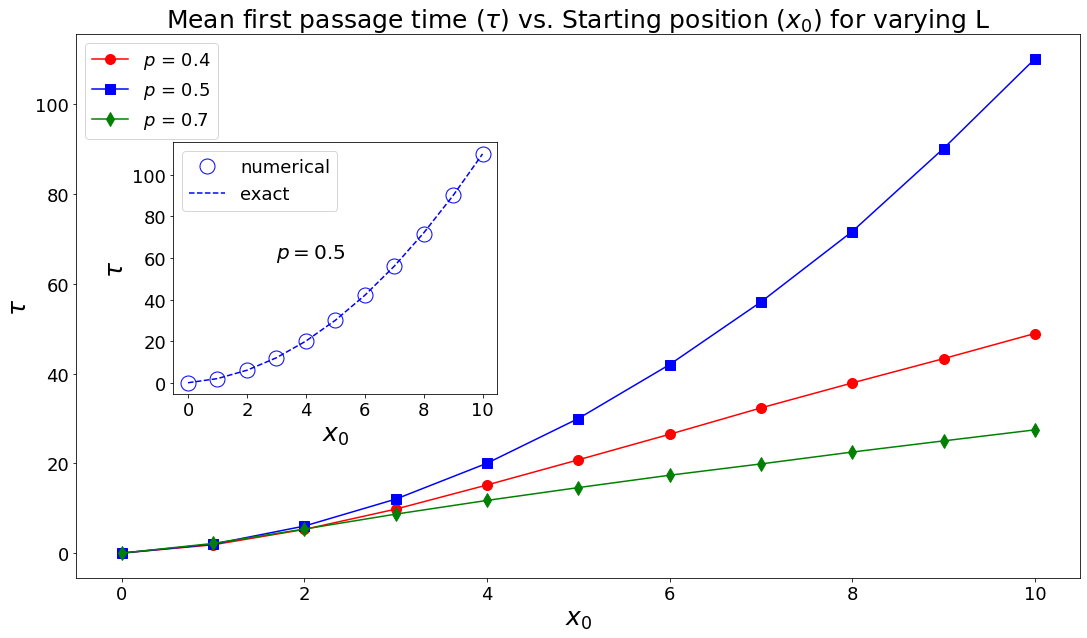

In [5]:
# figure layout
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.2,0.38,0.25,0.35]
ax2 = fig.add_axes([left, bottom, width, height])

D = 1/2 # self-diffusion coefficient
L = [x for x in range(1, 22, 2)] # lattice sizes
p = [0.4, 0.5, 0.7] # probability values

marker = ['o', 's', 'd']
color = ['r', 'b', 'g']

exact = np.zeros((len(p), len(L)))
numerical = np.zeros((len(p), len(L)))
xpos = np.zeros((len(p), len(L)))

for i, pval in enumerate(p):
    for j, lval in enumerate(L):
        walk = RestrictedRandomWalk1D(nsteps=10**3, ntrials=10**5, p=pval, L=lval)
        lat = [t for t in range(lval+1)]
        x0 = lat[lval//2] # starting position
        xpos[i,j] = x0
        numerical[i,j] = walk.average_nsteps_trap()
        exact[i,j] = x0*(lval-x0)/(2*D) # for p = 0.5 only
        
    ax1.plot(xpos[i,:], numerical[i,:], color = color[i], linestyle = "-", 
             marker = marker[i], markersize = 10,label = r'$p$ = {0:.2g}'.format(pval))
    
    if i == 1:
        ax2.plot(xpos[i,:], numerical[i,:], color = 'b', marker = 'o', markersize = 15,
                 linestyle = " ", markerfacecolor = 'none', label = 'numerical')
        ax2.plot(xpos[i,:], exact[i,:], color = 'b', linestyle = "--", label = 'exact')

ax1.set_xlabel(r'$x_0$', fontsize = 25)
ax1.set_ylabel(r'$\tau$', fontsize = 25)
ax1.set_title(r'Mean first passage time ($\tau$) vs. Starting position ($x_0$) for varying L',
              fontsize = 25)
ax1.legend(loc = 'best')
ax2.set_xlabel(r'$x_0$', fontsize = 25)
ax2.set_ylabel(r'$\tau$', fontsize = 25)
ax2.text(3, 60, r'$p = 0.5$', fontsize = 20)
ax2.legend(loc = 'best')
plt.savefig('../img/rfig_.png')
plt.savefig('../img/rfig_.pdf')
plt.show()

## A-3. Probability Distribution

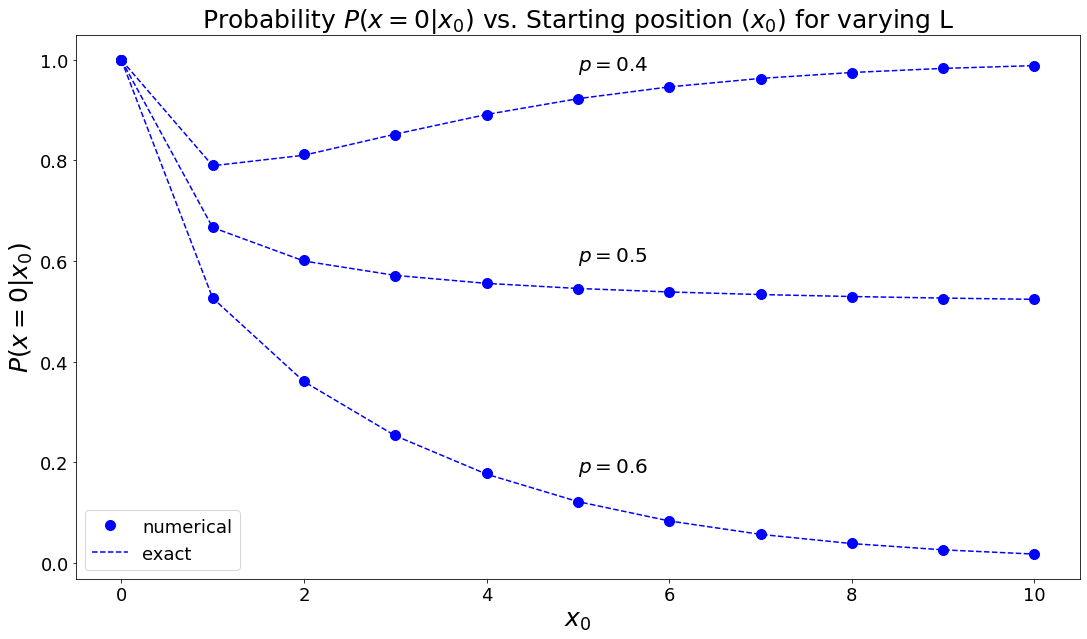

In [63]:
plt.subplots(figsize=(18, 10))

L = [c for c in range(1, 22,2)] # lattice sizes
p = [0.4, 0.5, 0.6] # probability values

exact = np.zeros((len(p), len(L)))
exact0 = np.zeros(len(L))
numerical = np.zeros((len(p), len(L)))
xpos = np.zeros((len(p), len(L)))

for i, pval in enumerate(p):
    for j, lval in enumerate(L):
        walk = RestrictedRandomWalk1D(nsteps=10**3, ntrials=10**5, p=pval, L=lval)
        lat = [c for c in range(lval+1)]
        x0 = lat[lval//2] # starting position
        xpos[i,j] = x0
        numerical[i,j] = walk.prob_trap()
        if i != 1:
            exact[i,j] = (((1-pval)/pval)**x0 - ((1-pval)/pval)**lval)/(1-((1-pval)/pval)**lval)
        
        if i == 1: # for p = 0.5
            exact0[j] = 1-x0/lval 
        
    plt.plot(xpos[i,:], numerical[i,:], color = 'b', linestyle = " ", marker = 'o', 
             markersize = 10,label = 'numerical')
    if i != 1:
        plt.plot(xpos[i,:], exact[i,:], color = 'b', linestyle = "--", label = 'exact')
    
    if i == 1:
        plt.plot(xpos[1,:], exact0, color = 'b', linestyle = "--")
    
    if i == 0:
        plt.legend(loc = 'best')
        
plt.xlabel(r'$x_0$', fontsize = 25)
plt.ylabel(r'$P(x = 0|x_0)$', fontsize = 25)
plt.title(r'Probability $P(x = 0|x_0)$ vs. Starting position ($x_0$) for varying L', fontsize = 25)
plt.text(5, 0.18, r'$p = 0.6$', fontsize = 20)
plt.text(5, 0.6, r'$p = 0.5$', fontsize = 20)
plt.text(5, 0.98, r'$p = 0.4$', fontsize = 20)
plt.savefig('../img/rfig0.png')
plt.savefig('../img/rfig0.pdf')
plt.show()

# B. Reflecting Boundaries

## B-1. Trajectories

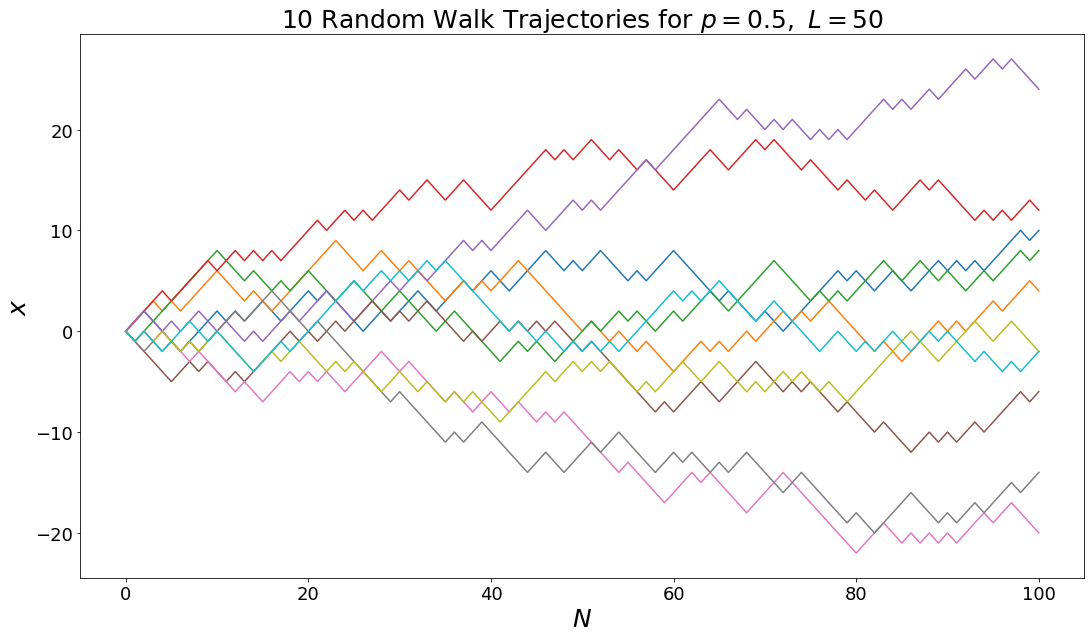

In [63]:
plt.subplots(figsize=(18, 10))
param_dict = {
    'nsteps': 10**2, 
    'ntrials': 10**3, 
    'p': 0.5,
    'L': 50,
    }
walk_1d = RestrictedRandomWalk1D(**param_dict)
x_arr, _, _, _ = walk_1d.reflecting_boundaries()

for i in range(10):
    plt.plot(range(len(x_arr[i,:])), x_arr[i,:])
    
plt.xlabel(r'$N$', fontsize = 25)
plt.ylabel(r'$x$', fontsize = 25)
plt.title(r'10 Random Walk Trajectories for $p=0.5, ~ L = 50$', fontsize = 25)
plt.savefig('../img/rfig1a.png')
plt.savefig('../img/rfig1a.pdf')
plt.show()

## B-2. Mean-Squared Displacement 

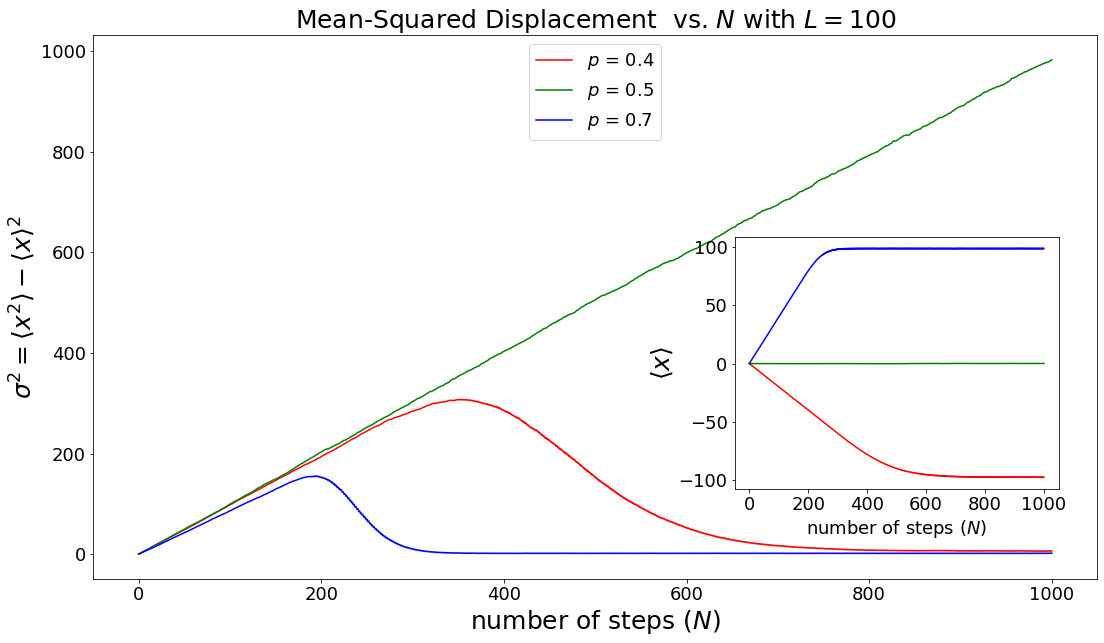

In [74]:
# figure layout
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.62,0.25,0.25,0.35]
ax2 = fig.add_axes([left, bottom, width, height])

color = ['r', 'g', 'b']
p = [0.4, 0.5, 0.7]
for i in range(len(p)):
    walk_1d = RestrictedRandomWalk1D(nsteps=10**3, ntrials=10**4, p=p[i], L=100)
    _, _, xbar, var_ = walk_1d.reflecting_boundaries()
    ax1.plot(range(len(var_)), var_,label = r"$p$ = {0:.2g}".format(p[i]),color = color[i])
    ax2.plot(range(len(xbar)), xbar, color = color[i])

ax1.set_xlabel(r'number of steps ($N$)', fontsize = 25)
ax1.set_ylabel(r'$\sigma^2 = \langle x^2\rangle-\langle x\rangle^2$', fontsize = 25)
ax1.set_title(r'Mean-Squared Displacement  vs. $N$ with $L = 100$', fontsize = 25)
ax1.legend(loc = 'upper center')
ax2.set_xlabel(r'number of steps ($N$)')
ax2.set_ylabel(r'$\langle x\rangle$', fontsize = 25)
plt.savefig('../img/rfig1b.png')
plt.savefig('../img/rfig1b.pdf')
plt.show()

## B-3. Mean Number of Distinct Sites Visited

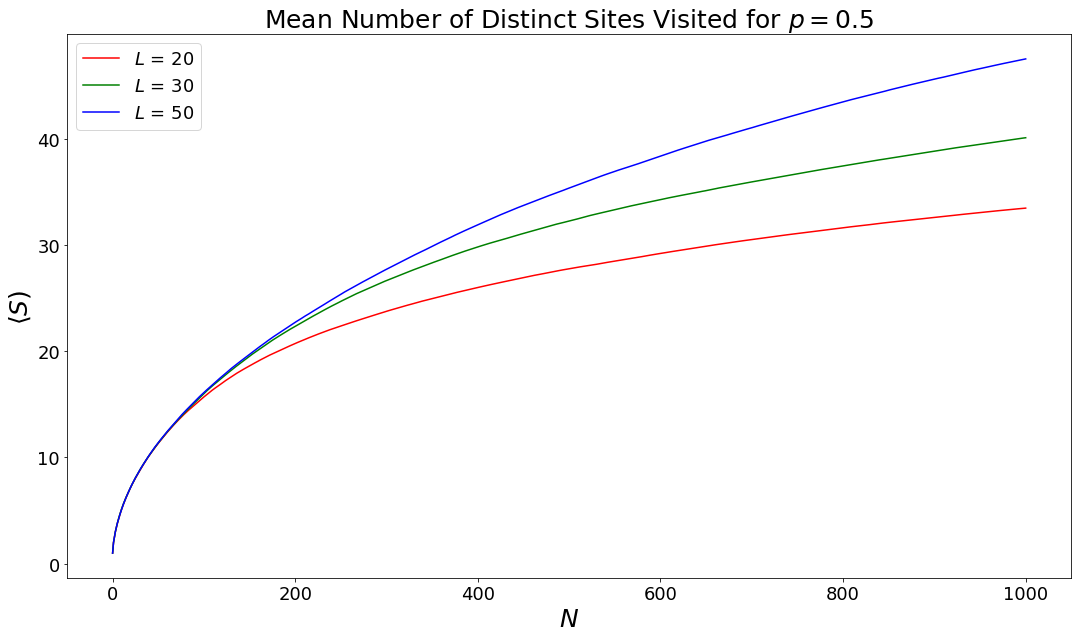

In [90]:
L = [20, 30, 50]
color = ['r', 'g', 'b']

plt.subplots(figsize=(18, 10))
for i in range(len(L)):
    walk_1d = RestrictedRandomWalk1D(nsteps=1000, ntrials=10000, p=0.5, L=L[i])
    res = walk_1d.average_sites_visited()
    plt.plot(range(len(res)), res, label = r"$L$ = {0:.2g}".format(L[i]), color = color[i])

plt.xlabel(r'$N$', fontsize = 25)
plt.ylabel(r'$\langle S$)', fontsize = 25)
plt.title(r'Mean Number of Distinct Sites Visited for $p= 0.5$', fontsize = 25)
plt.legend(loc = 'best')
plt.savefig('../img/rfig2a.png')
plt.savefig('../img/rfig2a.pdf')
plt.show()

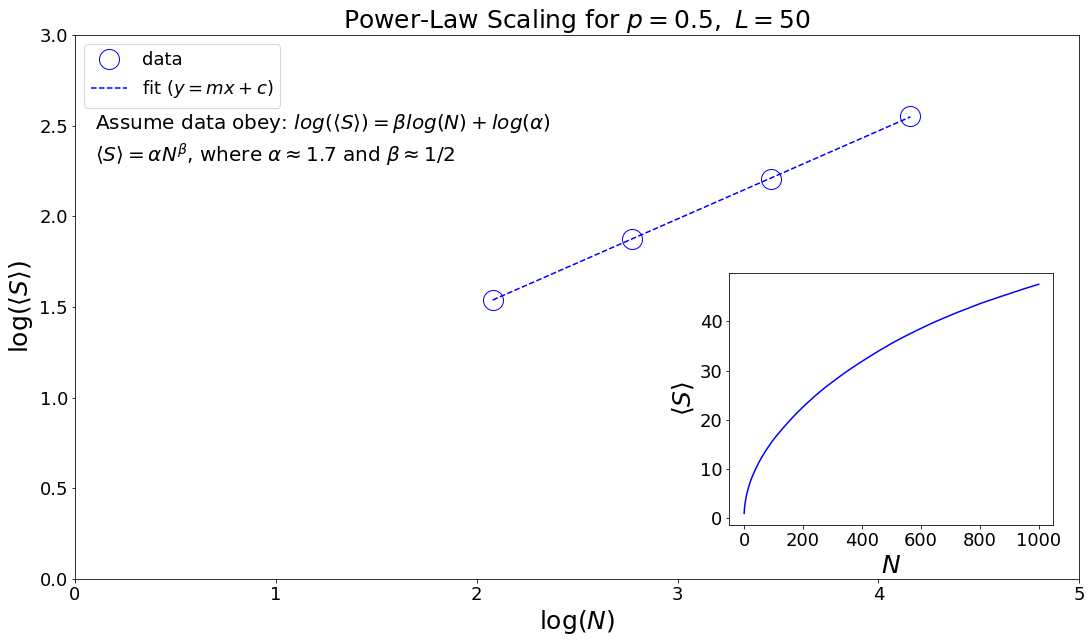

In [62]:
# figure layout
fig, ax1 = plt.subplots(figsize=(18, 10))
left, bottom, width, height = [0.63,0.2,0.25,0.35] 
ax2 = fig.add_axes([left, bottom, width, height])

# extract few values for log-log plot
walk_1d = RestrictedRandomWalk1D(nsteps=1000, ntrials=10000, p=0.5, L=50)
res = walk_1d.average_sites_visited()

n = [8, 16, 32, 64]
s = np.zeros(len(n))
for i, val in enumerate(n):
    s[i] = res[val]
    
# plot data
ax1.plot(np.log(n), np.log(s), color = 'b', marker = 'o',linestyle = " ", 
         markersize = 20, markerfacecolor = 'none', label = 'data')
ax2.plot(range(len(res)), res, color = 'b')

# fit data
m, c = np.polyfit(np.log(n), np.log(s), 1) # extract slope and intercept
ax1.plot(np.log(n), m*np.log(n) + c,  color = 'b', linestyle = "--", 
         label = r'fit ($y = mx + c$)')

ax1.set_xlim([0,5])
ax1.set_ylim([0,3])
ax1.set_xlabel(r'log($N$)', fontsize = 25)
ax1.set_ylabel(r'log($\langle S\rangle$)', fontsize = 25)
ax1.set_title(r'Power-Law Scaling for $p= 0.5,~L =50$', 
              fontsize = 25)
ax1.text(0.1,2.48, r'Assume data obey: $log(\langle S\rangle) = \beta log(N) + log(\alpha)$', 
         fontsize = 20)
ax1.text(0.1, 2.3, 
         r'$\langle S\rangle = \alpha N^{\beta}$, where $\alpha \approx 1.7$ and $\beta \approx 1/2$', 
         fontsize = 20)
ax1.legend(loc = 'upper left')
ax2.set_xlabel(r'$N$', fontsize = 25)
ax2.set_ylabel(r'$\langle S\rangle$', fontsize = 25)
plt.savefig('../img/rfig2b.png')
plt.savefig('../img/rfig2b.pdf')
plt.show()

## B-4. Probability Distribution

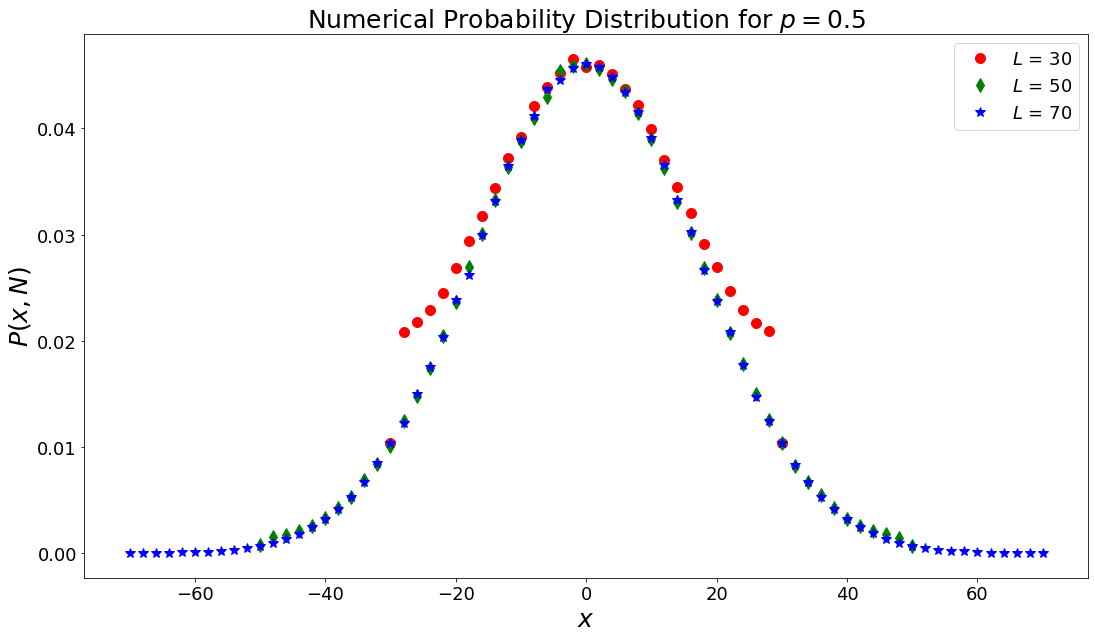

In [24]:
fig, ax = plt.subplots(figsize=(18, 10))

nsteps = 300
ntrials = 10**6
L = [30,50,70]
marker = ['o', 'd', '*']
color = ['r', 'g', 'b']

for i in range(len(L)):
    rwalk = RestrictedRandomWalk1D(nsteps=nsteps, ntrials=ntrials, p=0.5, L=L[i])
    _, rhashmap, _, _ = rwalk.reflecting_boundaries()
    rx_dist = pd.DataFrame({'x':rhashmap.keys(), 'val':[x/ntrials for x in rhashmap.values()]})
    rx_dist = rx_dist.groupby(['x']).mean()
    pd.Series(rx_dist.val, index = rx_dist.index).plot(ax = ax, color = color[i], marker = marker[i], 
                                                       linestyle = "", markersize = 10,
                                                       label = r"$L$ = {0:.2g}".format(L[i]))
plt.xlabel(r'$x$', fontsize = 25)
plt.ylabel(r'$P(x,N)$', fontsize = 25)
plt.title(r'Numerical Probability Distribution for $p = 0.5$', fontsize = 25)
plt.legend(loc = 'best')
plt.savefig('../img/rfig3.png')
plt.savefig('../img/rfig3.pdf')
plt.show()